# Argentinian Bioethanol Analysis
Today I wanted to try my hand at quickly understanding and forecasting a time-series dataset. I tried to find one that would challenge myself to quickly translate data. I've studied Spanish for a couple of years and found that the Argentinian government has some interesting datasets. I decided to check out the dataset for the Production of Bioethanol. It's expressed in cubic meters according to the input used in its production.

The portal for all of their around 1k datasets is here:
https://datos.gob.ar/dataset


The download for the Bioethanol data is here:
https://datos.agroindustria.gob.ar/dataset/produccion-bioetanol-por-insumo-utilizado

In [1]:
import pandas as pd
import os
from google_trans_new import google_translator 
#Get the current directory of the notebook
c_director = os.getcwd()

In [2]:
data = pd.read_csv(c_director + r'\\produccion-de-bioetanol-por-insumo-.csv')
data = pd.DataFrame(data)
data

,id_pais,nom_pais,año,mes,cod_unimed,nom_unimed,caña,maiz,total
0,32,Argentina,2017,Enero,m3,metros cubicos,37794,46551,84345
1,32,Argentina,2017,Febrero,m3,metros cubicos,35607,44489,80096
2,32,Argentina,2017,Marzo,m3,metros cubicos,38696,44100,82796
3,32,Argentina,2017,Abril,m3,metros cubicos,35355,45218,80573
4,32,Argentina,2017,Mayo,m3,metros cubicos,44053,40222,84275
5,32,Argentina,2017,Junio,m3,metros cubicos,51159,41800,92959
6,32,Argentina,2017,Julio,m3,metros cubicos,53924,43396,97320
7,32,Argentina,2017,Agosto,m3,metros cubicos,55711,48852,104563
8,32,Argentina,2017,Septiembre,m3,metros cubicos,55345,47483,102828
9,32,Argentina,2017,Octubre,m3,metros cubicos,60415,50850,111265


## Renaming Columns and Row Data to English

In [3]:
df_eng = data.rename({'id_pais':'parent_id',
                  'nom_pais':'parent_name',
                  'año':'year','mes':'month',
                  'cod_unimed':'measurement_code',
                  'nom_unimed':'measurement',
                  'caña':'sugar_cane',
                  'maiz':'corn'}, 
                  axis = 1)

# We can also do automated translations through the Google Translate API below

### Quick Demonstration of the Google Translate API

In [4]:
#define the translator as the US tranlsation API
translator = google_translator(url_suffix="us",timeout=5)  
#Quick demonstration translating "enero" to January (ES --> EN)
translate_text = translator.translate('enero',lang_src='auto',lang_tgt='auto') 
translate_text

'January '

In [5]:
translations = {}
df_translate = df_eng[['month','measurement']]
for i in df_translate.columns:
    unique = df_translate[i].unique()

    for k in unique:
        translations[k] = translator.translate(k)

#It had trouble translating this - Always check your translations
translations['Mayo'] = "May"

In [6]:
#Replace the spanish data points with English
df_eng.replace(translations, inplace=True)
df_eng

,parent_id,parent_name,year,month,measurement_code,measurement,sugar_cane,corn,total
0,32,Argentina,2017,January,m3,cubic meters,37794,46551,84345
1,32,Argentina,2017,February,m3,cubic meters,35607,44489,80096
2,32,Argentina,2017,March,m3,cubic meters,38696,44100,82796
3,32,Argentina,2017,April,m3,cubic meters,35355,45218,80573
4,32,Argentina,2017,May,m3,cubic meters,44053,40222,84275
5,32,Argentina,2017,June,m3,cubic meters,51159,41800,92959
6,32,Argentina,2017,July,m3,cubic meters,53924,43396,97320
7,32,Argentina,2017,August,m3,cubic meters,55711,48852,104563
8,32,Argentina,2017,September,m3,cubic meters,55345,47483,102828
9,32,Argentina,2017,October,m3,cubic meters,60415,50850,111265


Now that our data is prepared, let's fit some time-series graphs and a forecast model for fun before time's up

I also want to make my plots interactive this time around

In [7]:
#Insert day column for pandas datetime
df_eng.insert(4,"day",1,True)

#Make a new date-time column for plotting and time series data
df_eng['date'] = pd.to_datetime(df_eng[['day','month','year']].astype(str).sum(axis=1))

In [8]:
#Lets the plots interactive
#%matplotlib widget
from matplotlib import pyplot as plt
plt.figure(figsize= (10,5))

#Plot the two productions
x = df_eng['date']
y1 = df_eng['sugar_cane']
y2 = df_eng['corn']

plt.xlabel('Date')
plt.ylabel('Production in Cubic Meters')
plt.plot(x,y1, label = "Sugar Cane")
plt.plot(x,y2, label = "Corn")
plt.legend(bbox_to_anchor=(1, 1), loc='bottom left')

plt.title("Corn & Sugar Cane Bioethanol Production")

plt.show()


<Figure size 1000x500 with 1 Axes>

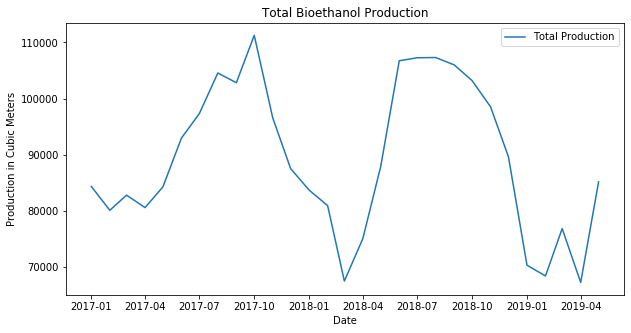

In [9]:
#Plot total of both of them
plt.figure(figsize= (10,5))
x = df_eng['date']
y1 = df_eng['total']

plt.xlabel('Date')
plt.ylabel('Production in Cubic Meters')
plt.plot(x,y1, label = "Total Production")
plt.title('Total Bioethanol Production')
plt.legend(bbox_to_anchor=(1, 1), loc='bottom left')

plt.show()

In [10]:
y_sugar = df_eng[['date','sugar_cane']]
y_sugar = y_sugar.set_index('date')

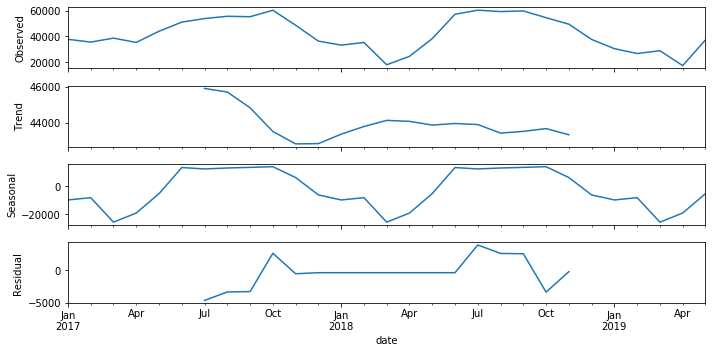

In [11]:
# lets decompose our time series quickly
# this allows us to decompose our time series into three distinct components: Trend, Seasonality, and Noise
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 10, 5
decomposition = sm.tsa.seasonal_decompose(y_sugar, model='additive')
fig = decomposition.plot()
plt.show()

The Sugar Cane definitely seems seasonal

In [12]:
y_corn = df_eng[['date','corn']]
y_corn = y_corn.set_index('date')

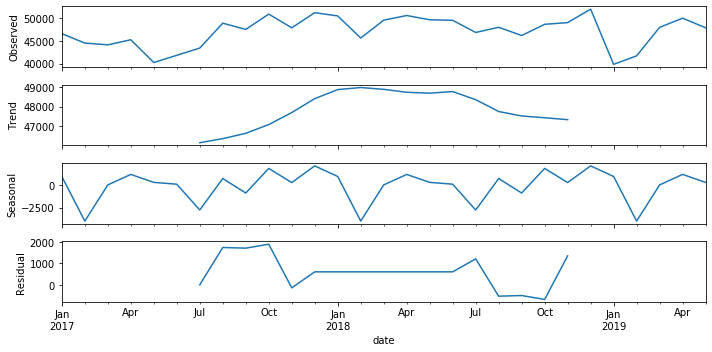

In [13]:
rcParams['figure.figsize'] = 10, 5
decomposition = sm.tsa.seasonal_decompose(y_corn, model='additive')
fig = decomposition.plot()
plt.show()

Looks like corn has some seasonality as well.

## ARIMA MODEL

ARIMA stands for Autoregressive Integrated Moving Average. 

In [14]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

model = ARIMA(y_corn, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.corn   No. Observations:                   28
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -265.095
Method:                       css-mle   S.D. of innovations           2990.180
Date:                Thu, 03 Dec 2020   AIC                            538.189
Time:                        17:13:18   BIC                            543.518
Sample:                    02-01-2017   HQIC                           539.818
                         - 05-01-2019                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           91.0287    104.115      0.874      0.390    -113.033     295.091
ar.L1.D.corn     0.4042      0.179      2.261      0.033       0.054       0.755
ma.L1.D.corn    -1.0000      0.122     -8.19

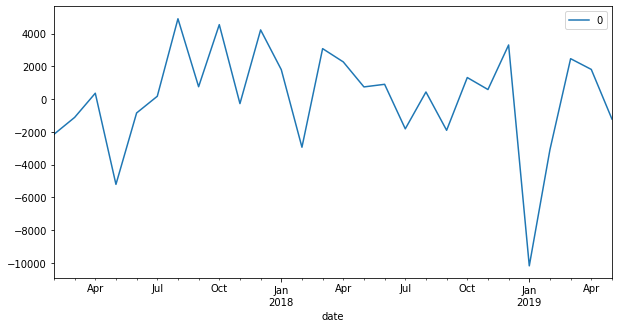

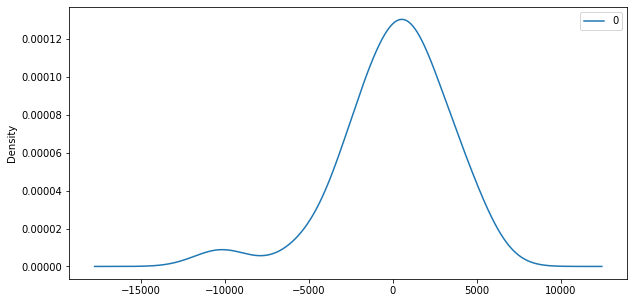

                  0
count     28.000000
mean     102.945520
std     3157.421061
min   -10190.214238
25%    -1371.612155
50%      507.820902
75%     1925.651073
max     4906.790780


In [16]:
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())